# **Zomato Data Analysis**

In [ ]:
# Inporting Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [ ]:
zomato = pd.read_csv("/content/drive/MyDrive/Data Sets/zomato_World_dataset.csv",encoding='latin-1')
zomato.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [ ]:
print("Table: Zomato")
print("\nData Type:\n")
print(zomato.dtypes)
print("")
print("All data types are correct!")

Table: Zomato

Data Type:

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

All data types are correct!


In [ ]:
print("Checking Null Values:")
print("")
print(zomato.isnull().sum())
print("")
print("Cuisines has 9 null values.")

Checking Null Values:

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Cuisines has 9 null values.


In [ ]:
[features for features in zomato.columns if zomato[features].isnull().sum()>0]

['Cuisines']

In [ ]:
# Cuisines has missing values, replace it with most appeared value.
zomato['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [ ]:
zomato['Cuisines'].fillna('North Indian', inplace=True)

In [ ]:
print(zomato.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
print("Any duplicates:", zomato.duplicated().sum())

Any duplicates: 0


## Merge Zomato Dataset with Country Code

In [ ]:
country_code=pd.read_excel('/content/drive/MyDrive/Data Sets/Country-Code.xlsx')
country_code.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


In [ ]:
final_data=pd.merge(zomato,country_code,on='Country Code', how='left')
final_data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [ ]:
#droping unwanted columns
zomato.drop(['Restaurant ID','Country Code','Locality Verbose','Longitude','Latitude'],axis=1,inplace=True)

In [ ]:
# One-liner to get data type and number of unique values for each column and display as DataFrame
col_details = pd.DataFrame([(col, dtype, unique_count) for col, dtype, unique_count in zip(zomato.columns, zomato.dtypes, zomato.nunique())],
                           columns=['Column', 'Data Type', 'Unique Values'])
col_details

,Column,Data Type,Unique Values
0,Restaurant Name,object,7446
1,City,object,141
2,Address,object,8918
3,Locality,object,1208
4,Cuisines,object,1825
5,Average Cost for two,int64,140
6,Currency,object,12
7,Has Table booking,object,2
8,Has Online delivery,object,2
9,Is delivering now,object,2


In [ ]:
top_3 = final_data['Country'].value_counts()[:3]
top_3

India             8652
United States      434
United Kingdom      80
Name: Country, dtype: int64

##Top 3 countries that uses zomato

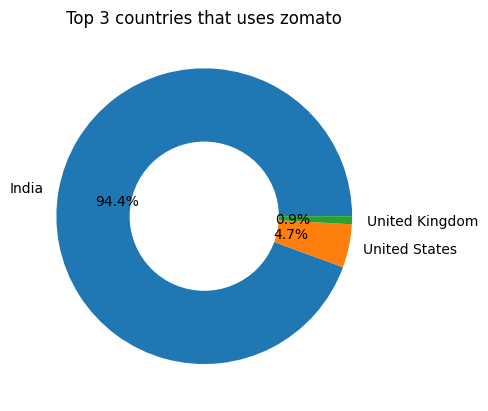



The top 3 countries that uses zomato are India, United States and United Kingdom


In [ ]:
plt.pie(top_3,labels=top_3.index,autopct='%1.1f%%')                  #Plotting Pie Chart
circle = plt.Circle( (0,0), 0.5, color='white')    #Creating a Circle
p=plt.gcf()                                        #Adding circle to the Pie Chart
p.gca().add_artist(circle)
plt.title("Top 3 countries that uses zomato")      #Add title

plt.show()
print("\n")
print("The top 3 countries that uses zomato are India, United States and United Kingdom")

###**Observation:** Zomato maximum records or transaction are from India After that USA and then United Kingdoms

## Top 10 countries that uses zomato

In [ ]:
top_10 = final_data['Country'].value_counts()[:10].rename_axis('Country').reset_index(name='count')
df_c=pd.DataFrame(top_10)    #converting it into dataframe.
top_10.style.background_gradient(cmap='Blues_r')

,Country,count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,UAE,60
5,South Africa,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


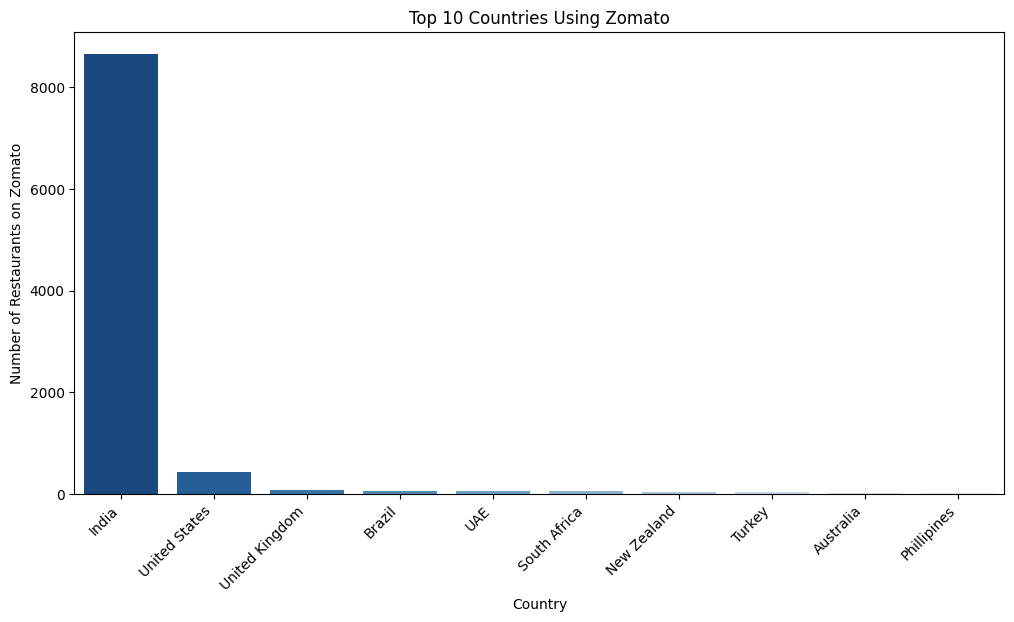

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='count', data=top_10, palette='Blues_r')
plt.title('Top 10 Countries Using Zomato')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants on Zomato')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## Countries with minimun transactions

In [ ]:
final_data['Country'].value_counts()[-3:].rename_axis('Country').reset_index(name='count').style.background_gradient(cmap='Blues')

,Country,count
0,Qatar,20
1,Sri Lanka,20
2,Canada,4


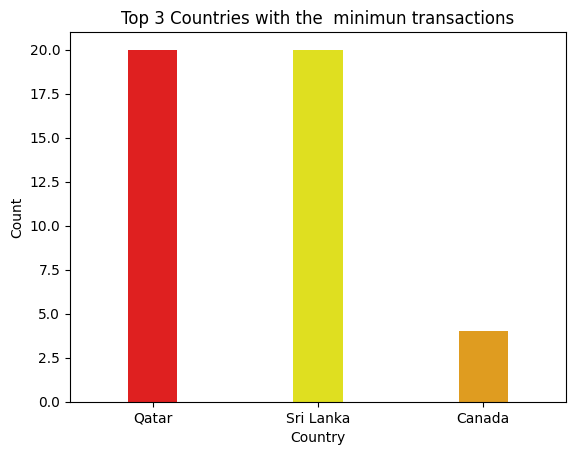

In [ ]:
country_counts = final_data['Country'].value_counts()[-3:].rename_axis('Country').reset_index(name='count')

sns.barplot(x='Country', y='count', data=country_counts,width=0.3,palette=['red','yellow','orange'])
plt.title('Top 3 Countries with the  minimun transactions')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Most popular Cuisines

In [ ]:
popular_cuisines=final_data['Cuisines'].value_counts()[:10].rename_axis('Cuisines').reset_index(name='count')
popular_cuisines.style.background_gradient(cmap='Blues_r')

,Cuisines,count
0,North Indian,945
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


<Axes: title={'center': 'Most popular Cuisines'}, xlabel='count', ylabel='Cuisines'>

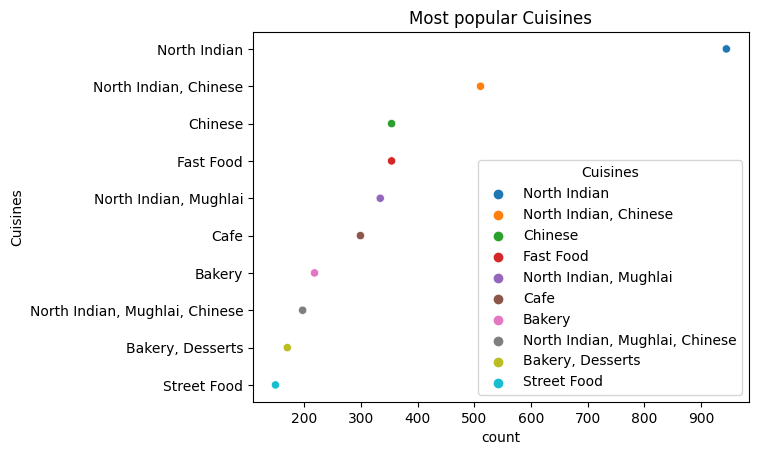

In [ ]:
plt.title("Most popular Cuisines")

sns.scatterplot(y=popular_cuisines['Cuisines'],x=popular_cuisines['count'],hue=popular_cuisines['Cuisines'])

## Analysing Has Online delivery

In [ ]:
# Analysing 'Has Online delivery' column

final_data['Has Online delivery' ].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

<Axes: xlabel='Has Online delivery', ylabel='count'>

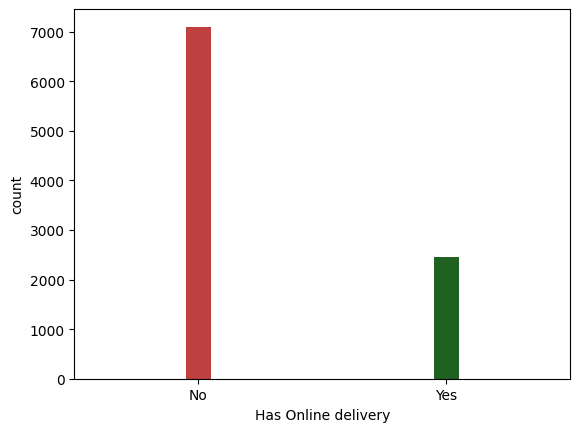

In [ ]:
sns.countplot(x='Has Online delivery',data=final_data,palette=['red','green'],saturation=0.5, width=0.1)

In [ ]:
# Which Countries do have online deliveries option

Has_online_dev = final_data[final_data['Has Online delivery']=='Yes'].Country.value_counts()
Has_online_dev

India    2423
UAE        28
Name: Country, dtype: int64

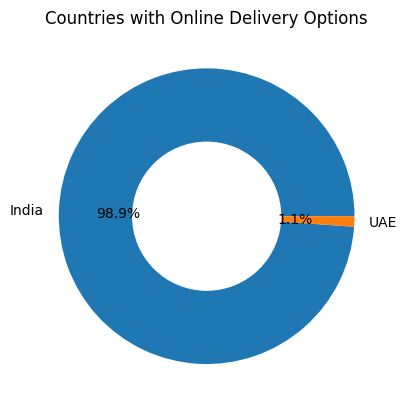

In [ ]:
plt.pie(Has_online_dev,labels=Has_online_dev.index,autopct='%1.1f%%')                  #Plotting Pie Chart
circle = plt.Circle( (0,0), 0.5, color='white')    #Creating a Circle
p=plt.gcf()                                        #Adding circle to the Pie Chart
p.gca().add_artist(circle)

plt.title('Countries with Online Delivery Options')
plt.show()

###Observations:

1. Online Deliveries are available in India and UAE

## Rating Analysis

In [ ]:
ratings=final_data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

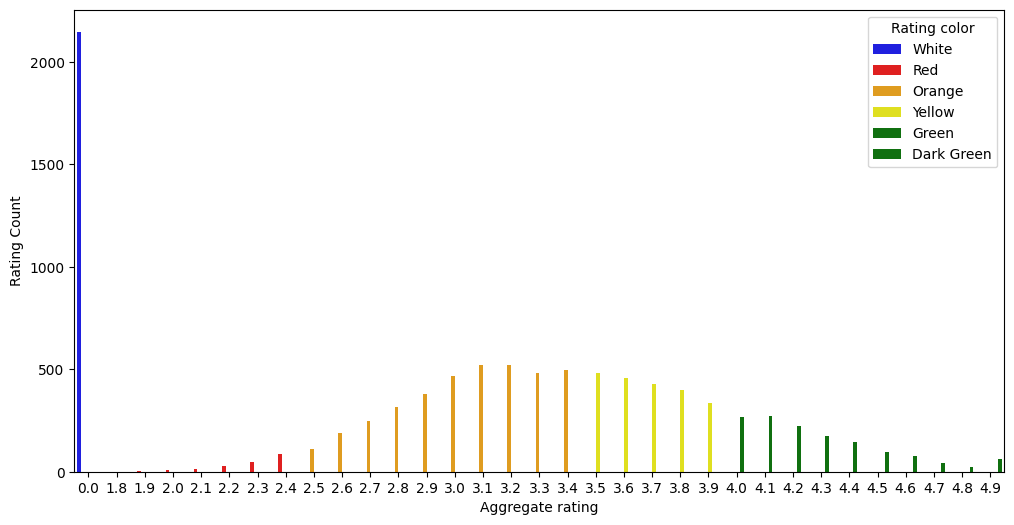

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

<Axes: xlabel='Rating color', ylabel='count'>

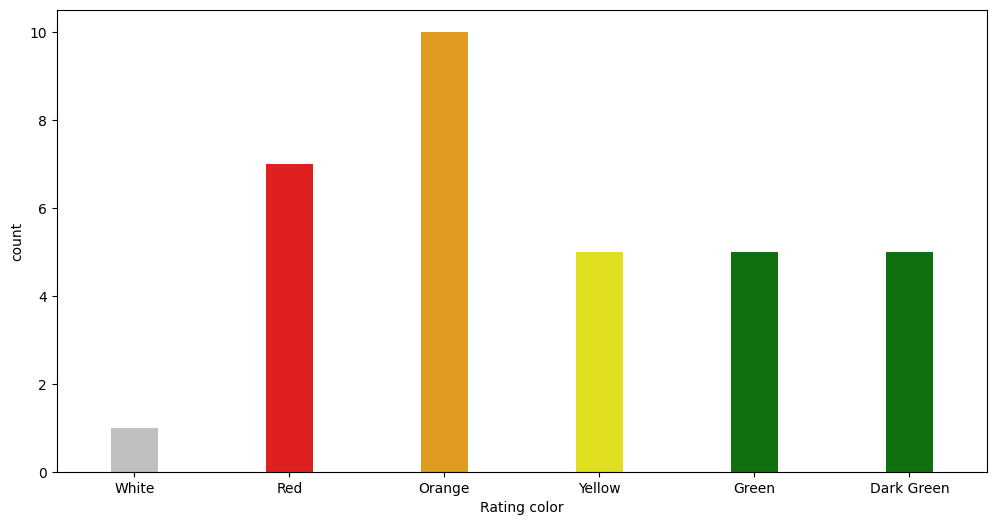

In [ ]:
# Count plot
sns.countplot(x="Rating color",data=ratings,palette=['silver','red','orange','yellow','green','green'],width=0.3)

### Observation
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 4.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor

###Observation:

1. Not Rated count is very high
2. Maximum number of rating are between 2.9 to 3.9

## Find the countries name that has given 0 rating

In [ ]:
final_data.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [ ]:
zero_rating_counts = final_data[final_data['Rating color']=='White'].groupby('Country').size().reset_index()
zero_rating_counts

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


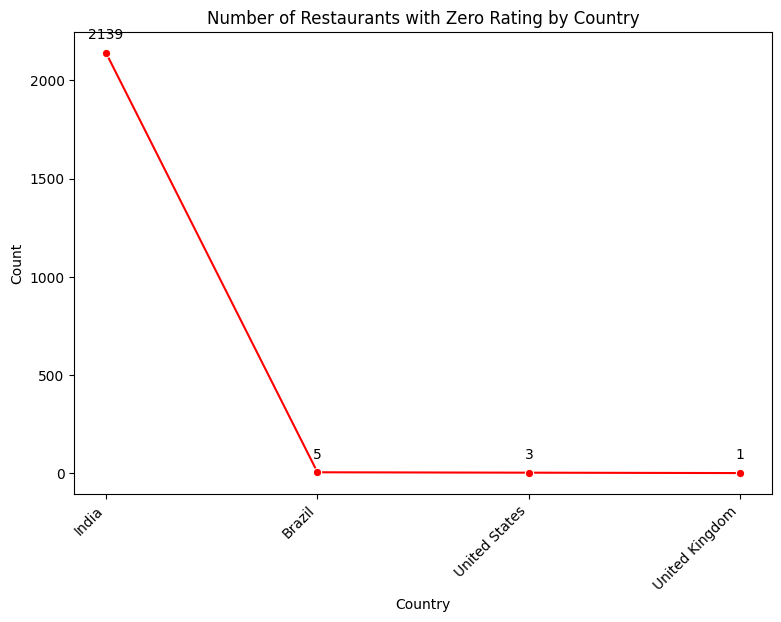

In [ ]:
zero_rating = final_data[final_data['Rating color'] == 'White'].groupby('Country').size().reset_index(name='Count')

# Sort the data by count in descending order
zero_rating = zero_rating.sort_values(by='Count', ascending=False)

plt.figure(figsize=(9, 6))
sns.lineplot(x='Country', y='Count', data=zero_rating, marker='o', color='red')
plt.title('Number of Restaurants with Zero Rating by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Annotate each data point with the count
for index, row in zero_rating.iterrows():
    plt.annotate(row['Count'], (row['Country'], row['Count']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

###**Observations:** Maximum number of 0 ratings are from Indian customers

## Find out which currency is used by which country?

In [ ]:
currency = final_data[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()
currency.style.background_gradient(cmap='Blues_r')

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


## Create a chart for top 5 cities distribution.

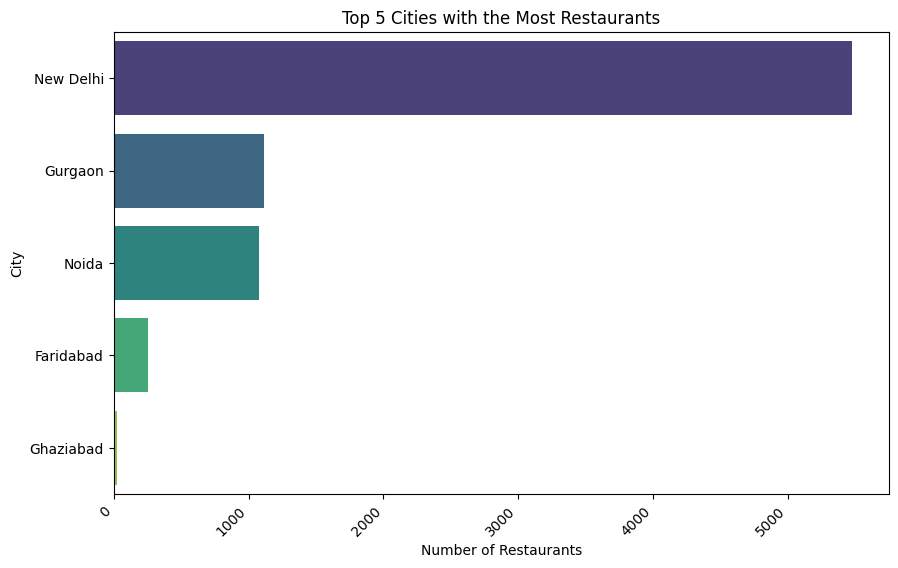

In [ ]:
top_5_cities = final_data['City'].value_counts().head(5)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cities.values, y=top_5_cities.index, palette='viridis')
plt.title('Top 5 Cities with the Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.show()

Maxm nuber of transaction happen from New delhi then grugram ,Noida